<a href="https://colab.research.google.com/github/Solotea10/Product-Sales-Analysis/blob/main/Product_Sales_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**



**Help the company in finding trends and insights**

Corp ltd is a small scaled business venture. They have been selling 4 products over the last 10 years.
The products are
 .P1
 .P2
 .P3
 .P4
They have collected data from there retail centres and organised it into a small csv file which has been given to you.

**The excel file contains about 8 numerical parameters**

 .Q1 - Total unit sales of product 1
 .Q2 - Total unit sales of product 2
 .Q3 - Total unit sales of product 3
 .Q4 - Total unit sales of product 4

 .S1 - Total revenue from product 1
 .S2 - Total revenue from product 2
 .S3 - Total revenue from product 3
 .S4 - Total revenue from product 4

Can you help Corp ltd with you analytical and data science skills

Some examples of data insights Corp ltd would like you to provide
. Is there any trend in the sales of all four products during certain months
. Out of all four products which product has seen the highest sales in all the given years
.The company has all its retail centres closed on 31st December every year. Mr Harairahan the CEO would love to get the
 estimate of number of units of each product that would be sold on 31st December every year if there retail centres where
 kept open each year.
.The CEO is considering the idea of dropping the production of any one of the products. He wants you to analyse the data and
 and suggest whether his idea would result in a massive setback for the company.
. This would require Machine learning. Do further research into regression, clustering etc. The CEO would like to predict the
  revenue and sales for the year 2024. He wants you to give a yearly estimate with the best possible accuracy.
    


# **DATA INGESTION**

In [3]:
#IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime as dt
from sklearn.linear_model import LinearRegression

In [1]:
from google.colab import files
uploaded=files.upload()

Saving statsfinal.csv to statsfinal.csv


In [5]:
#LOADING THE DATASET
data = pd.read_csv('statsfinal.csv')

## **EXPLORATORY DATA ANALYSIS**

In [6]:
# CHECKING THE FIRST 5 AND LAST 5 LINES OF THE DATASET
data.head(-1)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4594,4594,29-01-2023,1227,3044,5510,1896,3889.59,19298.96,29864.20,13518.48
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62


In [7]:
data.columns

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4'],
      dtype='object')


.The dataset has 4599 rows and 10 columns
.The start date for the dataset is 13th June 2010 and the end date is 2nd February 2023.
 Therefore the years 2010 and 2023 are incomplete hence cant be relied on for analysis.
 Those two years should be dropped.
.There is a column named Unnamed: 0. This we can drop because its a repeat of our ID.
.The data contains a column named Date with other columns being
  - There total unit of sales for P1,P2,P3,P4 with columns named Q-P1,Q-P2,Q-P3 and Q-P4 respectively.
  - There total revenue from sales for P1,P2,P3,P4 being under columns named S-P1,S-P2,S-P3 and S-P4 respectively.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4600 non-null   int64  
 1   Date        4600 non-null   object 
 2   Q-P1        4600 non-null   int64  
 3   Q-P2        4600 non-null   int64  
 4   Q-P3        4600 non-null   int64  
 5   Q-P4        4600 non-null   int64  
 6   S-P1        4600 non-null   float64
 7   S-P2        4600 non-null   float64
 8   S-P3        4600 non-null   float64
 9   S-P4        4600 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 359.5+ KB



  Date is the only non numerical data type in the entire dataset

In [9]:
# DROPPING THE UNNAMED COLUMN
data = data.drop(columns=['Unnamed: 0'])

In [10]:
data.isnull().sum()

Date    0
Q-P1    0
Q-P2    0
Q-P3    0
Q-P4    0
S-P1    0
S-P2    0
S-P3    0
S-P4    0
dtype: int64


 There are no missing values in the data. This isnt common.
 We will look into feature engineering and missing value handling to resolve this issue
 While dealing with fresh data we will do alot of cleaning which may result into missing data.

In [11]:
# STATISTICAL ANALYSIS OF THE DATA
data.describe()

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,4121.849130,2130.281522,3145.740000,1123.500000,13066.261743,13505.984848,17049.910800,8010.555000
std,2244.271323,1089.783705,1671.832231,497.385676,7114.340094,6909.228687,9061.330694,3546.359869
min,254.000000,251.000000,250.000000,250.000000,805.180000,1591.340000,1355.000000,1782.500000
25%,2150.500000,1167.750000,1695.750000,696.000000,6817.085000,7403.535000,9190.965000,4962.480000
50%,4137.000000,2134.000000,3202.500000,1136.500000,13114.290000,13529.560000,17357.550000,8103.245000
75%,6072.000000,3070.250000,4569.000000,1544.000000,19248.240000,19465.385000,24763.980000,11008.720000
max,7998.000000,3998.000000,6000.000000,2000.000000,25353.660000,25347.320000,32520.000000,14260.000000


 Separating the datetime
 First we separate the days, months and years.
 We extract the year from the year, day and month using the lambda function
 This will also help us  analyse sales year to year

In [12]:
data['Day'] = data['Date'].apply(lambda x:x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x:x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x:x.split('-')[2])


In [13]:
# LETS DROP THE ROWS FOR THE YEARS 2010 AND 2023
data_reduced = data.query("Year ! = '2010' and Year ! = '2023'")
print(data_reduced)

            Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
201   01-01-2011   281  3956  4186  1537    890.77  25081.04  22688.12   
202   02-01-2011  7665  1350  4266  1789  24298.05   8559.00  23121.72   
203   03-01-2011   937  3758  4311   314   2970.29  23825.72  23365.62   
204   04-01-2011  6378   968  4530   995  20218.26   6137.12  24552.60   
205   05-01-2011   731  2174  5908  1505   2317.27  13783.16  32021.36   
...          ...   ...   ...   ...   ...       ...       ...       ...   
4561  26-12-2022  7600   662  4510   988  24092.00   4197.08  24444.20   
4562  27-12-2022  7114  2948   681   700  22551.38  18690.32   3691.02   
4563  28-12-2022  7759   356  1834  1142  24596.03   2257.04   9940.28   
4564  29-12-2022  6457  1851  3369   669  20468.69  11735.34  18259.98   
4565  30-12-2022  7284  1417   788  1369  23090.28   8983.78   4270.96   

          S-P4 Day Month  Year  
201   10958.81  01    01  2011  
202   12755.57  02    01  2011  
203    2238.

# DATA VISUALISATION

In [14]:
#CORRELATION ANALYSIS
data_reduced.corr()

,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
Q-P1,1.000000,-0.001194,-0.005619,-0.054932,1.000000,-0.001194,-0.005619,-0.054932
Q-P2,-0.001194,1.000000,0.003120,0.014021,-0.001194,1.000000,0.003120,0.014021
Q-P3,-0.005619,0.003120,1.000000,-0.005917,-0.005619,0.003120,1.000000,-0.005917
Q-P4,-0.054932,0.014021,-0.005917,1.000000,-0.054932,0.014021,-0.005917,1.000000
S-P1,1.000000,-0.001194,-0.005619,-0.054932,1.000000,-0.001194,-0.005619,-0.054932
S-P2,-0.001194,1.000000,0.003120,0.014021,-0.001194,1.000000,0.003120,0.014021
S-P3,-0.005619,0.003120,1.000000,-0.005917,-0.005619,0.003120,1.000000,-0.005917
S-P4,-0.054932,0.014021,-0.005917,1.000000,-0.054932,0.014021,-0.005917,1.000000


<Axes: >

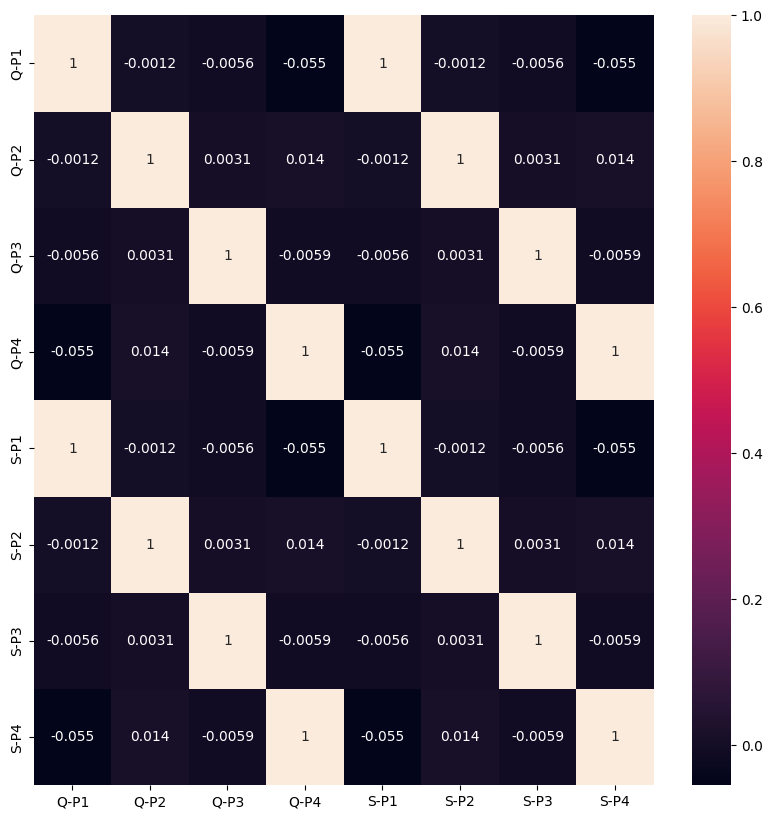

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data_reduced.corr(),annot=True)

In [16]:
sales_by_year=data_reduced.groupby('Year').sum().reset_index()
print(sales_by_year)

    Year     Q-P1    Q-P2     Q-P3    Q-P4        S-P1        S-P2  \
0   2011  1435633  751692  1160897  412322  4550956.61  4765727.28   
1   2012  1508611  769797  1144590  417920  4782296.87  4880512.98   
2   2013  1533099  754526  1116114  405394  4859923.83  4783694.84   
3   2014  1572144  789069  1162719  403748  4983696.48  5002697.46   
4   2015  1484197  767964  1112136  413251  4704904.49  4868891.76   
5   2016  1517603  783892  1112698  408415  4810801.51  4969875.28   
6   2017  1469715  808843  1166668  419020  4658996.55  5128064.62   
7   2018  1531419  751252  1152070  398550  4854598.23  4762937.68   
8   2019  1482623  785373  1135262  410425  4699914.91  4979264.82   
9   2020  1498357  778322  1175277  419854  4749791.69  4934561.48   
10  2021  1504995  786444  1166733  407373  4770834.15  4986054.96   
11  2022  1459829  760510  1115085  389915  4627657.93  4821633.40   

          S-P3        S-P4  
0   6292061.74  2939855.86  
1   6203677.80  2979769.60  
2 

In [17]:
Monthly_Product_Sales= data_reduced.groupby('Month')['Q-P1','Q-P2','Q-P3','Q-P4'].sum()
print(Monthly_Product_Sales)

          Q-P1    Q-P2     Q-P3    Q-P4
Month                                  
01     1523624  825689  1154182  415185
02     1405024  699493  1057576  367420
03     1506574  812963  1127503  418276
04     1514945  761336  1157296  410606
05     1504004  792094  1249675  409208
06     1524601  758334  1119747  400807
07     1569086  765296  1132366  423951
08     1489380  808367  1121974  405372
09     1399678  752893  1174812  415644
10     1507764  751435  1118691  403087
11     1505391  779935  1162968  422512
12     1503883  761068  1093924  400313
9        44271   18781    49535   13806


# WHICH PRODUCT HAS HAD THE HIGHEST SALES OVER THE YEARS

In [18]:
dq = data_reduced.sum()
print(dq)

Date     01-01-201102-01-201103-01-201104-01-201105-01-...
Q-P1                                              17998225
Q-P2                                               9287684
Q-P3                                              13720249
Q-P4                                               4906187
S-P1                                           57054373.25
S-P2                                           58883916.56
S-P3                                           74363749.58
S-P4                                           34981113.31
Day      0102030405060708091011121314151617181920212223...
Month    0101010101010101010101010101010101010101010101...
Year     2011201120112011201120112011201120112011201120...
dtype: object


# Observation
Product P1 has had the highest sales over the years as can be seen above selling 17,998,225 units sold from January 2011 to
December 2022.

In [19]:
def month_plot():
    fig, ax= subplots()

In [20]:
# create a figure and axis
def month_plot():
    fig, ax= subplots()

In [21]:
def plot_bar_chart(df, columns, stri, str1, val):
    # Aggregate sales for each product by year, by sum or mean
    if val == 'sum':
        sales_by_year = data_reduced.groupby('Year')[columns].sum().reset_index()
    elif val == 'mean':
        sales_by_year = data_reduced.groupby('Year')[columns].mean().reset_index()

    # Melt the data to make it easier to plot
    sales_by_year_melted = pd.melt(sales_by_year, id_vars='Year', value_vars=columns, var_name='Product', value_name='Sales')

     # Create a bar chart
    plt.figure(figsize=(20,4))
    sns.barplot(data=sales_by_year_melted, x='Year', y='Sales', hue='Product') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(stri)
    plt.title(f'{stri} by {str1}')
    plt.xticks(rotation=45)
    plt.show()

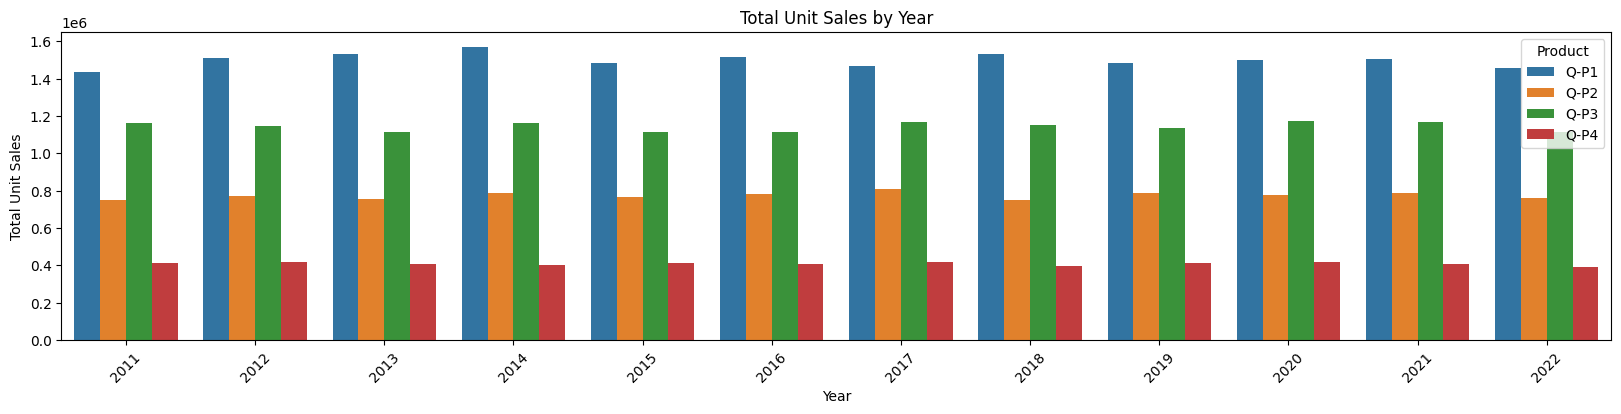

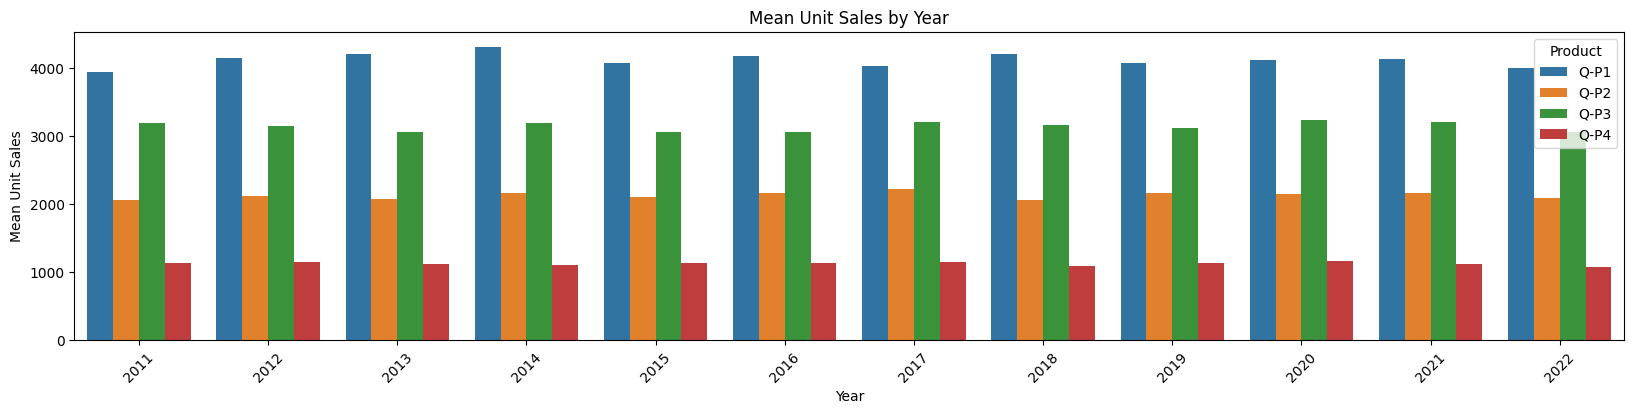

In [22]:
#use the plot_bar_chart function, enter the Unit Sales Columns and the Unit Sales string
plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Total Unit Sales', 'Year', 'sum')

plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Mean Unit Sales', 'Year', 'mean')

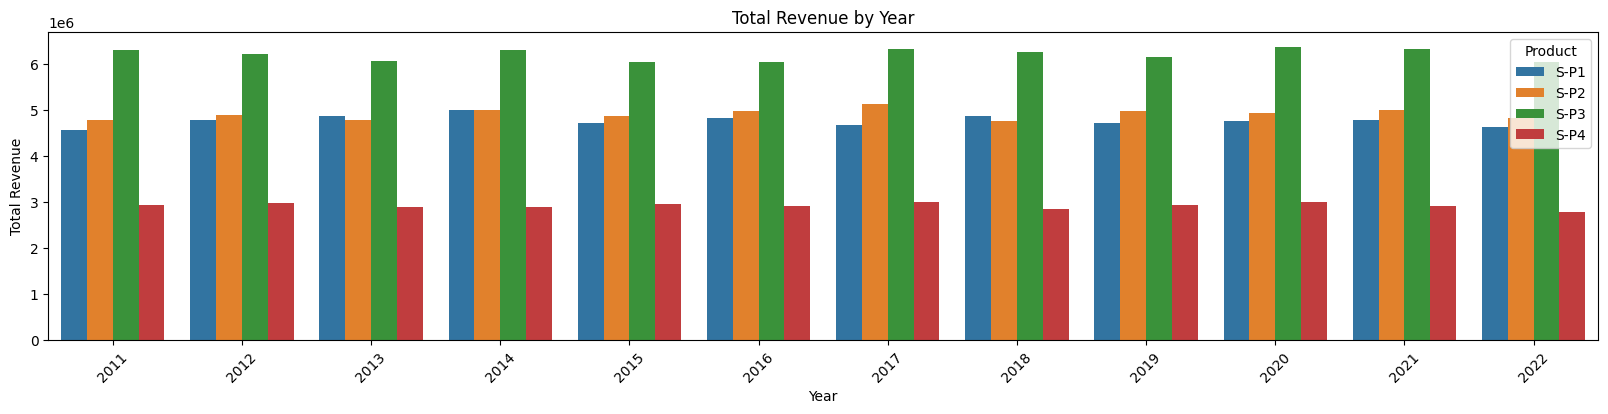

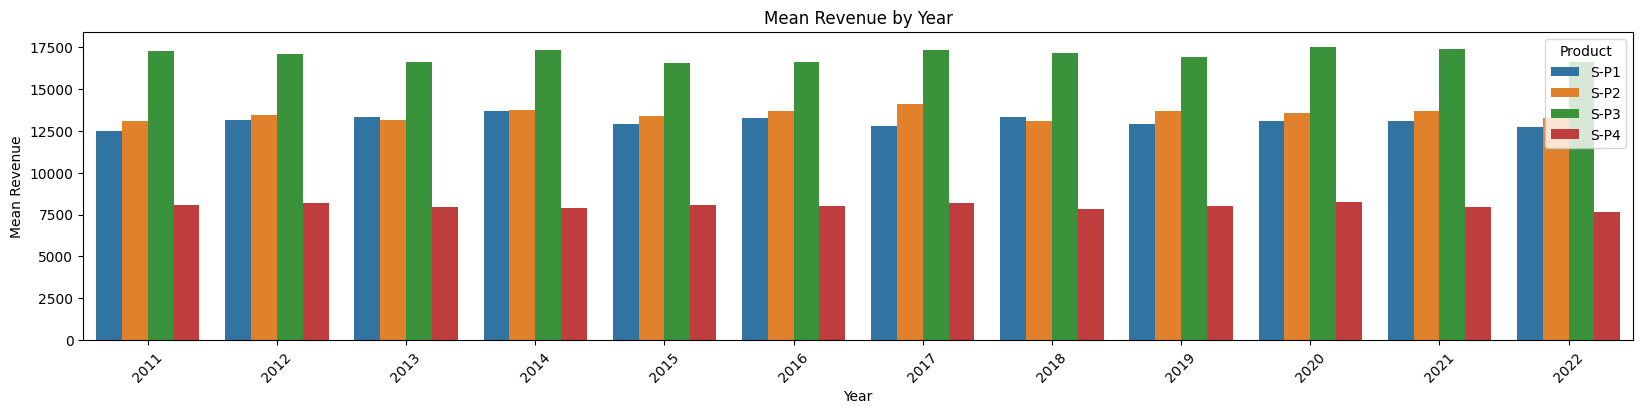

In [23]:
#use the plot_bar_chart function, enter the Revenue Columns and the Revenue string
plot_bar_chart(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Total Revenue', 'Year', 'sum')

plot_bar_chart(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Mean Revenue', 'Year', 'mean')

In [24]:
Monthly_Revenue= data_reduced.groupby('Month')['S-P1','S-P2','S-P3','S-P4'].sum()
print(Monthly_Revenue)


             S-P1        S-P2        S-P3        S-P4
Month                                                
01     4829888.08  5234868.26  6255666.44  2960269.05
02     4453926.08  4434785.62  5732061.92  2619704.60
03     4775839.58  5154185.42  6111066.26  2982307.88
04     4802375.65  4826870.24  6272544.32  2927620.78
05     4767692.68  5021875.96  6773238.50  2917653.04
06     4832985.17  4807837.56  6069028.74  2857753.91
07     4974002.62  4851976.64  6137423.72  3022770.63
08     4721334.60  5125046.78  6081099.08  2890302.36
09     4436979.26  4773341.62  6367481.04  2963541.72
10     4779611.88  4764097.90  6063305.22  2874010.31
11     4772089.47  4944787.90  6303286.56  3012510.56
12     4767309.11  4825171.12  5929068.08  2854231.69
9       140339.07   119071.54   268479.70    98436.78


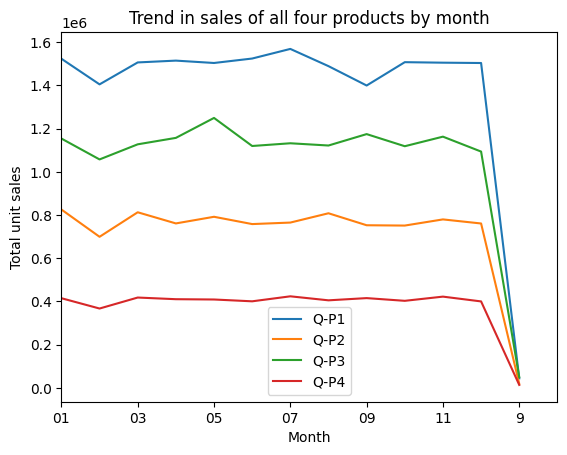

In [25]:
# Create a figure and axis
def month_plot():
    fig, ax = plt.subplots()

    # Plot the sales data for each product by month
    data_reduced.groupby('Month')[['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']].sum().plot(ax=ax)

    # Set the x-axis limits to only show up to December
    ax.set_xlim(left=0, right=13)

    # Set the axis labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Total unit sales')
    ax.set_title('Trend in sales of all four products by month')

    # Show the plot
    plt.show()

month_plot()

We can observe that all products drop in Feb.
There also appears a very drastic drop after 12th month.
The value show 9, which must be part of month 09. We need to rename this column to match with the 09. Before doing further analysis.


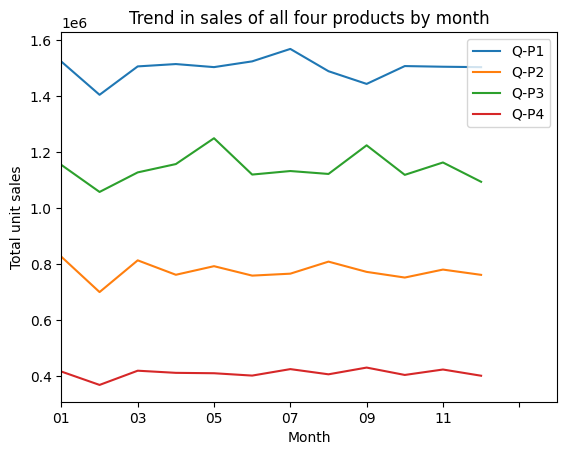

In [26]:
# Replace all entries of '9' in the Month column with '09'
data_reduced['Month'] = data['Month'].replace('9', '09')
month_plot()

observation

We have merged the sales for months 9 and 09.
We can observe that Feb and Dec have the lowest sales for each product
For P1 We can observe Mar - Jul having the highest unit sales
For P2 We can observe Jan, Mar - Aug having the highest unit sales
For P3 We can observe May & Sep having the highest unit sales
For P4 We can observe uniform sales from Jan - Dec

Estimate for each product the unit of sales that could be sold on 31st of Dec, if all their retail centers were kept open.¶
Question

The company has all it's retail centers closed on the 31st of December every year. Mr: Hariharan , the CEO , would love to get an estimate on no: of units of each product that could be sold on 31st of Dec , every year , if all their retail centers were kept open.

In [27]:
#get the 31st day for each month in each year. Note: not every month has 31 days
def month_31_data(df, months):
    m31_data = df[df['Month'].isin(months) & (df['Day'] == '31')]
    return m31_data

_31_months = month_31_data(data_reduced, ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
_31_months


,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
231,31-01-2011,939,3325,1863,1612,2976.63,21080.50,10097.46,11493.56,31,01,2011
290,31-03-2011,464,2220,421,1663,1470.88,14074.80,2281.82,11857.19,31,03,2011
351,31-05-2011,1507,2980,3816,1202,4777.19,18893.20,20682.72,8570.26,31,05,2011
412,31-07-2011,4336,744,4717,667,13745.12,4716.96,25566.14,4755.71,31,07,2011
442,31-08-2011,4548,1484,1596,1974,14417.16,9408.56,8650.32,14074.62,31,08,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
4352,31-05-2022,3669,2710,3067,1593,11630.73,17181.40,16623.14,11358.09,31,05,2022
4413,31-07-2022,1437,833,1867,1270,4555.29,5281.22,10119.14,9055.10,31,07,2022
4443,31-08-2022,1035,1639,3658,841,3280.95,10391.26,19826.36,5996.33,31,08,2022
4474,31-9-2022,6964,1873,5481,1336,22075.88,11874.82,29707.02,9525.68,31,09,2022


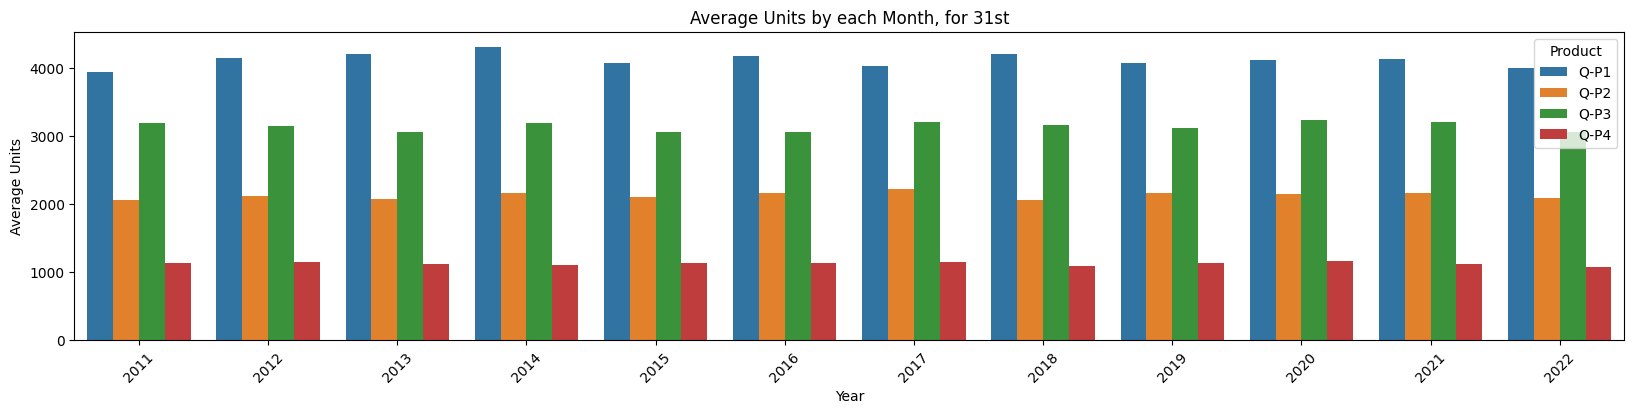

In [28]:
plot_bar_chart(_31_months, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'], 'Average Units', 'each Month, for 31st', 'mean')

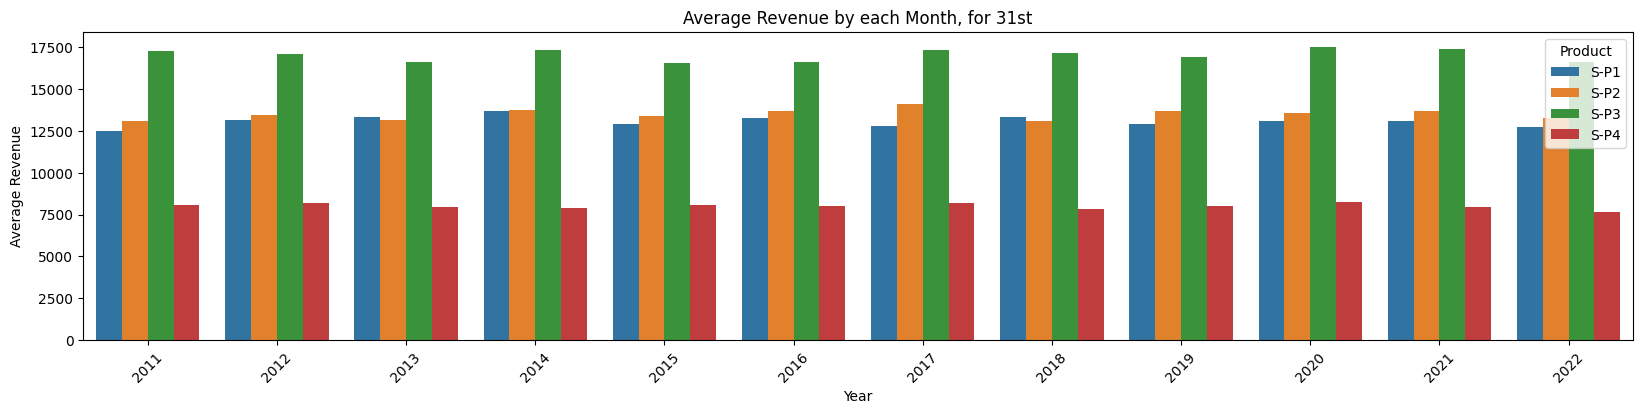

In [29]:
plot_bar_chart(_31_months, ['S-P1', 'S-P2', 'S-P3', 'S-P4'], 'Average Revenue', 'each Month, for 31st', 'mean')


Overall we can see that P1 has the highest unit sales on the 31st for each year, except for 2021 and 2022. (These could be as a result to Covid and other economy issues.)
P3 has the second highest unit sales for all the 31st in each year.

In [30]:
# gives us the average for all the 31st days across all years for each product
def avg_on_31st(df, product):
    df_31 = df[df['Day'] == '31']
    avg_sales = df_31[product].mean()
    return avg_sales

In [31]:
# Average for Unit Sales
avg_on_31st(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']).round(2)


Q-P1    3813.74
Q-P2    2058.80
Q-P3    3183.88
Q-P4    1098.61
dtype: float64

In [32]:
# Average for Revenue
avg_on_31st(data_reduced, ['S-P1', 'S-P2', 'S-P3', 'S-P4']).round(2)


S-P1    12089.55
S-P2    13052.78
S-P3    17256.63
S-P4     7833.07
dtype: float64

In [33]:
grouped_data=data.groupby(['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4','Month'])
print(data)

            Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
0     13-06-2010  5422  3725   576   907  17187.74  23616.50   3121.92   
1     14-06-2010  7047   779  3578  1574  22338.99   4938.86  19392.76   
2     15-06-2010  1572  2082   595  1145   4983.24  13199.88   3224.90   
3     16-06-2010  5657  2399  3140  1672  17932.69  15209.66  17018.80   
4     17-06-2010  3668  3207  2184   708  11627.56  20332.38  11837.28   
...          ...   ...   ...   ...   ...       ...       ...       ...   
4595  30-01-2023  2476  3419   525  1359   7848.92  21676.46   2845.50   
4596  31-01-2023  7446   841  4825  1311  23603.82   5331.94  26151.50   
4597  01-02-2023  6289  3143  3588   474  19936.13  19926.62  19446.96   
4598  02-02-2023  3122  1188  5899   517   9896.74   7531.92  31972.58   
4599  03-02-2023  1234  3854  2321   406   3911.78  24434.36  12579.82   

          S-P4 Day Month  Year  
0      6466.91  13    06  2010  
1     11222.62  14    06  2010  
2      8163.

In [34]:
data.groupby(['S-P1', 'S-P2', 'S-P3', 'S-P4']).sum()


Q-P1  Q-P2  Q-P3  Q-P4
S-P1     S-P2     S-P3     S-P4                            
805.18   6802.82  3696.44  9917.83    254  1073   682  1391
         21689.14 3035.20  7293.99    254  3421   560  1023
808.35   25068.36 7701.82  13532.74   255  3954  1421  1898
811.52   22183.66 28173.16 5026.65    256  3499  5198   705
833.71   10359.56 5967.42  9839.40    263  1634  1101  1380
...                                   ...   ...   ...   ...
25334.64 14943.38 24541.76 9411.60   7992  2357  4528  1320
25340.98 5737.70  18644.80 5846.60   7994   905  3440   820
         19831.52 6840.04  8306.45   7994  3128  1262  1165
25347.32 16940.48 17978.14 8292.19   7996  2672  3317  1163
25353.66 24833.78 11826.44 3087.29   7998  3917  2182   433

[4600 rows x 4 columns]

In [35]:
x=data
y=data

In [ ]:
print(x)
print(y)

            Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
0     13-06-2010  5422  3725   576   907  17187.74  23616.50   3121.92   
1     14-06-2010  7047   779  3578  1574  22338.99   4938.86  19392.76   
2     15-06-2010  1572  2082   595  1145   4983.24  13199.88   3224.90   
3     16-06-2010  5657  2399  3140  1672  17932.69  15209.66  17018.80   
4     17-06-2010  3668  3207  2184   708  11627.56  20332.38  11837.28   
...          ...   ...   ...   ...   ...       ...       ...       ...   
4595  30-01-2023  2476  3419   525  1359   7848.92  21676.46   2845.50   
4596  31-01-2023  7446   841  4825  1311  23603.82   5331.94  26151.50   
4597  01-02-2023  6289  3143  3588   474  19936.13  19926.62  19446.96   
4598  02-02-2023  3122  1188  5899   517   9896.74   7531.92  31972.58   
4599  03-02-2023  1234  3854  2321   406   3911.78  24434.36  12579.82   

          S-P4 Day Month  Year  
0      6466.91  13    06  2010  
1     11222.62  14    06  2010  
2      8163.

In [ ]:
import math
try:
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,stratify=y.iloc[:,1],random_state=1)
except ValueError:
 print('Least populated class in x and in y has only 1 member')


<IPython.core.display.Javascript object>

Least populated class in x and in y has only 1 member


# **CONCLUSION**



We can see that our previous observation correlate as Q-P1 has the higest estimate, follwed by Q-P3
We can approxiamte that the company will make:
Q-P1: 3813.74
Q-P2: 2058.80
Q-P3: 3183.88
Q-P4: 1098.61




Unit Sales:2011 - 2022

P1 has the highest unit sales for each year and it's highest is in year 2014.
We can observe that P4 has the lowest unit sales of all the products for each year and its lowest in 2022.

Revenues:2011 - 2022

We can observe that P3 brought in the most revenue. This could be as a result of multiple things:
P3 was sold for higher than the rest, as it had the second highest unit sales for each year.
We can observe that P1 and P2 brought in almost similar revenues for each year with P2 bringing in slightly more.
P1 despite having the most unit sold, brought in the second lowest revenue each year.

Average Monthly Sales:2011 - 2022

We can observe that all Products unit sales drop in February.
We can observe that February and December have the lowest sales for each product.
For P1 We can observe March - July having the highest unit sales.
For P2 We can observe January, March - August having the highest unit sales.
For P3 We can observe May & September having the highest unit sales.
For P4 We can observe uniform sales from January - December.

Estimated Unit Sales for 31st of Dec

This value can not be properly estimated with out Machine Learning. Currently we used the average for all the 31st days across all years for each product.

Overall we can see that P1 has the highest unit sales on the 31st for each year, except for 2021 and 2022. (These could be as a result to Covid and other economy issues.)
P3 has the second highest unit sales for all the 31st in each year.
We can see that our previous observation correlate as Q-P1 has the higest estimate, followed by Q-P3
We can approxiamte that the company will make:
Q-P1: 3813.74
Q-P2: 2058.80
Q-P3: 3183.88
Q-P4: 1098.61

If one product had to be dropped it should be P4 because it sells the least quantities and brings in the least revenue
thoughout the period.
